(array([1.032e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.780e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.060e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 7.190e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 6.490e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.490e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.980e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        5.200e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.160e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.780e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.630e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.020e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.880e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.400e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.220e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.990e+02,
        0.000e+00, 0.000e+00, 0.000e+0

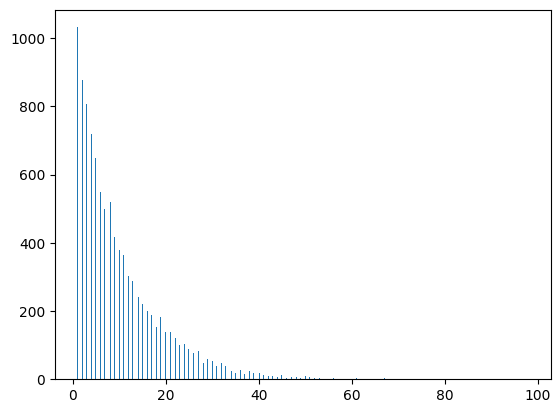

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bisect

nrSamples = 10000
samples = np.random.uniform(0,1,nrSamples)
geometric_p = 0.1
Geo = np.floor(np.log(samples)/np.log(1-geometric_p)) + 1
k = 6

plt.hist(Geo,bins=500)

[0.         0.14583333 0.10416667 0.125      0.0625     0.25
 0.3125    ]


(array([0.3066, 0.    , 0.205 , 0.    , 0.2512, 0.    , 0.1226, 0.    ,
        0.4886, 0.626 ]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

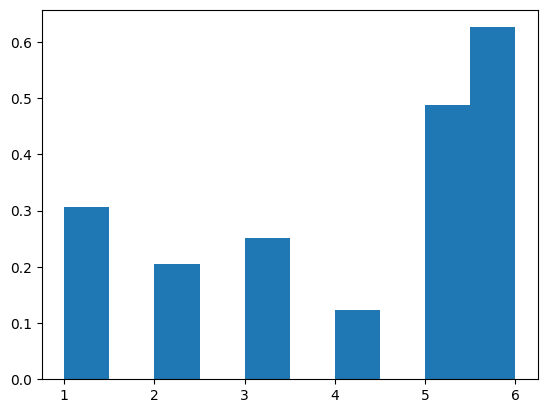

In [5]:
#Task 2

X = np.array([0,7/48,5/48,1/8,1/16,1/4,5/16])
print(X)
CDF_X = X.cumsum()

#a) Crude method
def crude_approx(X,CDF_X,samples):
    X_approx = []
    for s in samples:
        X_approx += [bisect.bisect_right(CDF_X,s)]

    return X_approx

X_crude = crude_approx(X,CDF_X,samples)
plt.hist(X_crude,density=True)

5312


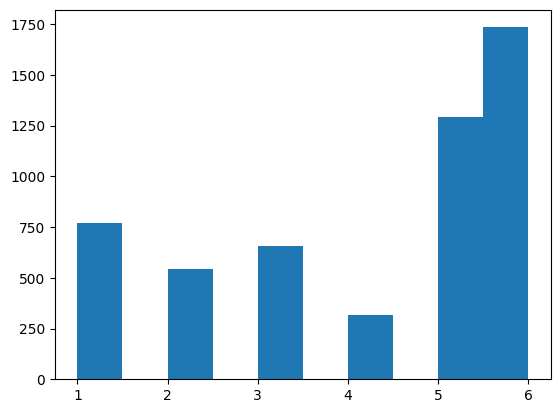

In [4]:
#b) Rejection Method
def rejectionMethod(samples,X,k):
    c = np.max(X) + 0.0000001

    X_reject = []
    for idx,u1 in enumerate(samples):

        I = int(min(np.floor((k*u1)) + 1,6))
        pi = X[I]
        if(samples[idx - 1]<=pi/c):
            X_reject += [I]

    return X_reject

X_reject = rejectionMethod(np.random.uniform(0,1,nrSamples),X,k)
plt.hist(X_reject)
print(len(X_reject))

In [ ]:
#Task c)

over_k = np.where(X>=1/k)[0]
under_k = np.where(X<1/k)[0]

remaining_probability = dict()
deficient_probability = dict()

for i in over_k:
    remaining_probability[i] = X[i] - 1/k

for j in under_k:
    deficient_probability[j] = X[j] - 1/k

alias_table = dict()

for i in range(1,k+1):
    alias_table[i] = i

for j,deficiency in deficient_probability.items():
    for i,remaining in remaining_probability.items():
        if np.abs(deficiency)<=remaining:
            alias_table[j] = i
            remaining_probability[i] = remaining + deficiency

discrete_samples = np.random.randint(1,k+1,nrSamples)

print(alias_table)
X_alias = []
for d in discrete_samples:
    if(d in over_k):
        X_alias += [d]
    else:
        if(np.random.uniform(0,1)<= X[d]):
            X_alias += [d]
        else:
            X_alias += [alias_table[d]]

plt.hist(X_alias)

In [ ]:
X